<p align="center">
  <img src="../../../img/tec_banner.png" alt="tec" width="700"/>
</p>

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 1
## Análisis exploratorio de datos

- Objetivo

    2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

    2.2 Abordar y corregir los problemas identificados en los datos.


# Carga de datos

In [1]:
import os
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 50)

In [2]:
data_path = '../../../data/'

In [3]:
raw_csv = 'raw/counts_30min.csv'

raw_data_file = os.path.join(data_path, raw_csv)

raw_df = pd.read_csv(raw_data_file, index_col=0, low_memory=False)
raw_df.head(5)

,event_timestamp,country_code,country_name,city_code,city_name,zip_code,lat,lon,cam_id,cam_name,people,storage_blob
0,2024-04-14 01:14:20.216944+00:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,1,MX/cafe calaverita/2024-04-13 19:14:20.216944-...
1,2024-04-14 01:32:41.359175+00:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,6,MX/cafe calaverita/2024-04-13 19:32:41.359175-...
2,2024-04-14 02:11:06.906063+00:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,3,MX/cafe calaverita/2024-04-13 20:11:06.906063-...
3,2024-04-14 02:45:35.383399+00:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,3,MX/cafe calaverita/2024-04-13 20:45:35.383399-...
4,2024-04-14 03:19:58.561536+00:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,2,MX/cafe calaverita/2024-04-13 21:19:58.561536-...


# Revisión de datos crudos

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 524
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_timestamp  525 non-null    object 
 1   country_code     525 non-null    object 
 2   country_name     182 non-null    object 
 3   city_code        182 non-null    object 
 4   city_name        182 non-null    object 
 5   zip_code         182 non-null    float64
 6   lat              525 non-null    float64
 7   lon              525 non-null    float64
 8   cam_id           182 non-null    float64
 9   cam_name         525 non-null    object 
 10  people           525 non-null    int64  
 11  storage_blob     525 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 53.3+ KB


In [5]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
zip_code,182.0,9460.00000,0.000000e+00,9460.00000,9460.00000,9460.00000,9460.00000,9460.00000
lat,525.0,19.36487,0.000000e+00,19.36487,19.36487,19.36487,19.36487,19.36487
lon,525.0,-99.13421,1.422441e-14,-99.13421,-99.13421,-99.13421,-99.13421,-99.13421
cam_id,182.0,1.00000,0.000000e+00,1.00000,1.00000,1.00000,1.00000,1.00000
people,525.0,3.28000,2.236000e+00,0.00000,2.00000,3.00000,5.00000,10.00000


## Revisión visual de datos faltantes

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

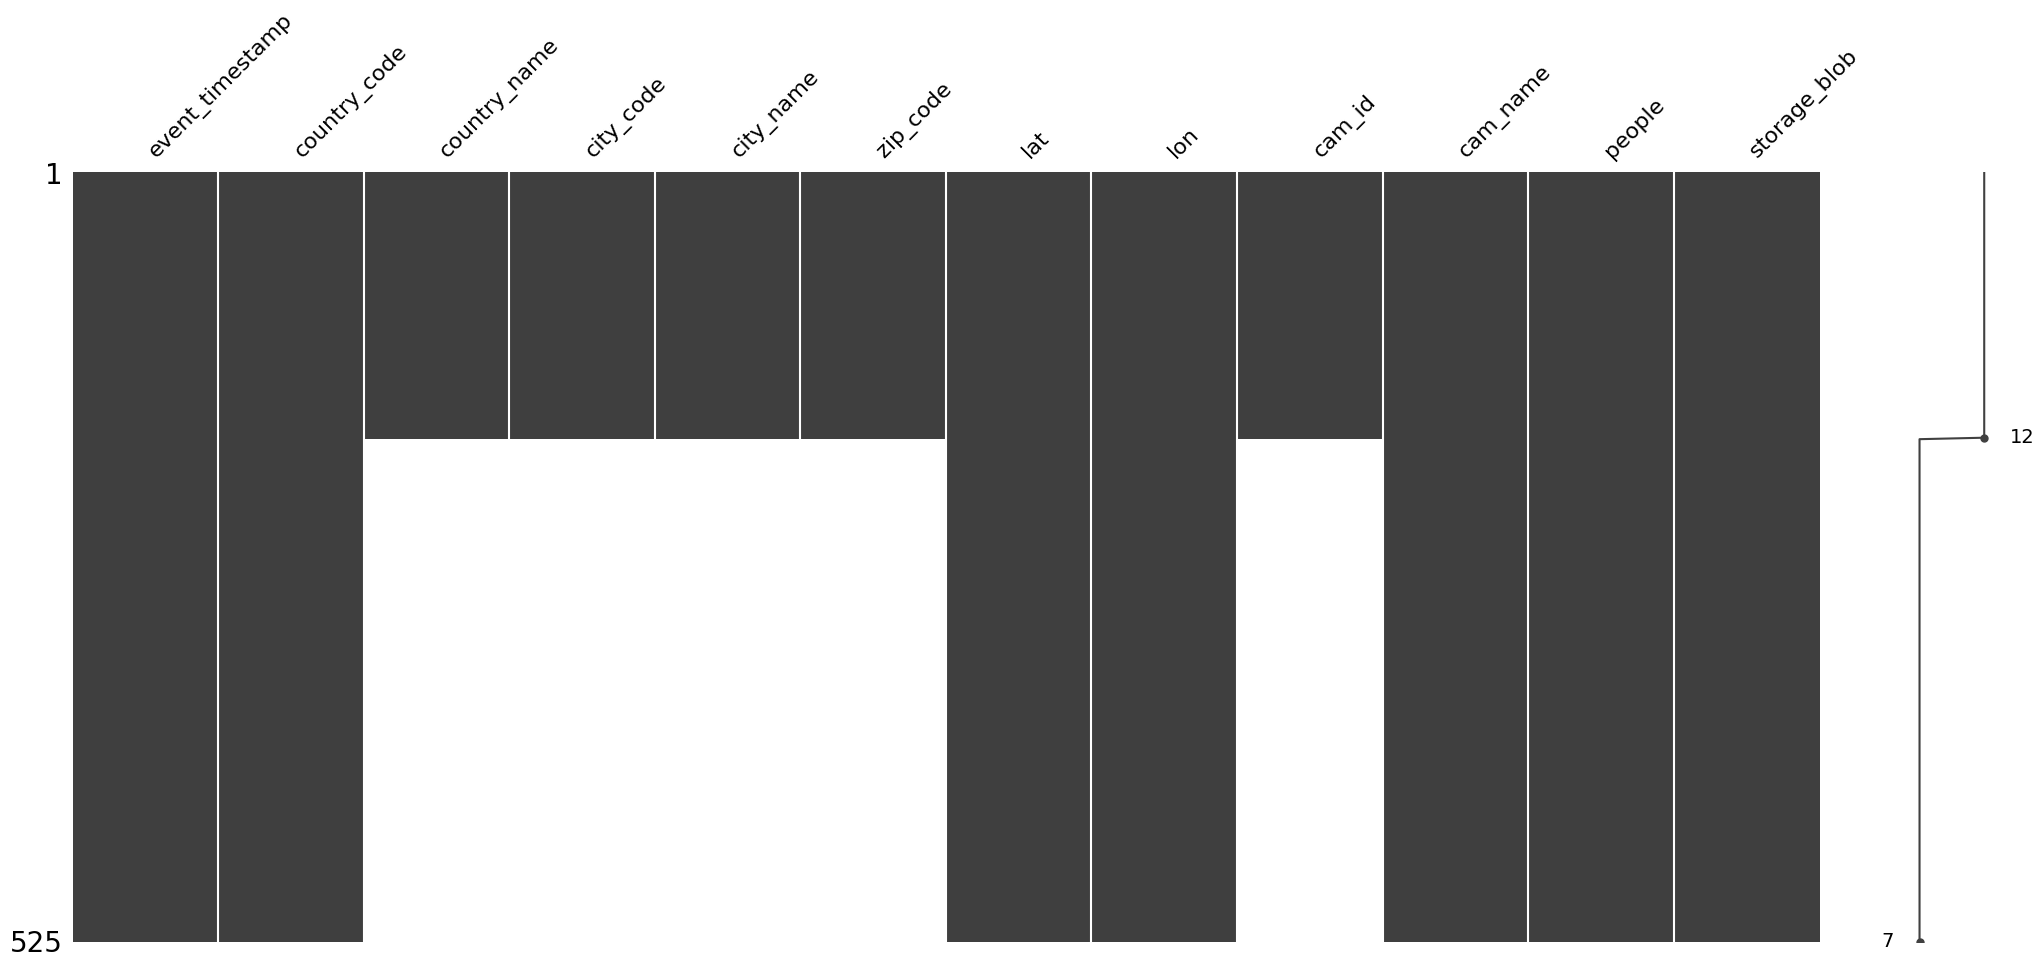

In [7]:
msno.matrix(raw_df)
plt.show()

# Convertir timestamp a datetime64

In [8]:
raw_df['event_timestamp'] = pd.to_datetime(raw_df['event_timestamp'])
raw_df['event_timestamp'] = raw_df['event_timestamp'].dt.tz_convert('America/Mexico_City')

raw_df.set_index('event_timestamp', inplace=True)

raw_df.head(3)

,country_code,country_name,city_code,city_name,zip_code,lat,lon,cam_id,cam_name,people,storage_blob
event_timestamp,,,,,,,,,,,
2024-04-13 19:14:20.216944-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,1,MX/cafe calaverita/2024-04-13 19:14:20.216944-...
2024-04-13 19:32:41.359175-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,6,MX/cafe calaverita/2024-04-13 19:32:41.359175-...
2024-04-13 20:11:06.906063-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,3,MX/cafe calaverita/2024-04-13 20:11:06.906063-...


## Visualización de serie de tiempo

In [9]:
import matplotlib.dates as mdates

In [10]:
def plot_df_counts(df, figsize=(13, 3), grouped=False, agg2plot=None, intervalo=''):
    """
    Genera un gráfico de líneas del conteo de personas a lo largo del tiempo.

    Parámetros:
    df (DataFrame): DataFrame de pandas que contiene los datos a graficar.
    figsize (tuple, opcional): Tamaño de la figura del gráfico.
    grouped (bool, opcional): Indica si los datos están agrupados por alguna métrica.
    agg2plot (str, opcional): Nombre de la columna agregada a graficar si los datos están agrupados.
    intervalo (str, opcional): Intervalo de tiempo de los datos para incluir en el título.

    Devuelve:
    None: Esta función no devuelve nada, solo muestra el gráfico.
    """

    # Configura el tamaño de la figura del gráfico
    plt.figure(figsize=figsize)
    
    # Grafica los datos agrupados o el conteo de personas por captura
    if grouped and agg2plot:
        plt.plot(df.index, df[agg2plot], '-o', markersize=2, label='Conteo')  
        metrica = agg2plot
    else:
        plt.plot(df.index, df['people'], '-o', markersize=2, label='Conteo')   
        plt.plot(df.index, np.zeros(df.shape[0]), 'o', markersize=2, color='darkgreen', label='Capturas')  
        metrica = 'por captura'
    
    # Configura el formato de las etiquetas del eje x para fechas
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    
    # Ajusta la orientación de las etiquetas de fecha
    plt.gcf().autofmt_xdate()
    
    # Establece las etiquetas y el título del gráfico
    plt.xlabel('Fecha')
    plt.ylabel('Número de personas')
    titulo = f'Conteo de personas ({metrica}) {intervalo}'
    plt.title(titulo)
    
    # Activa la grilla para mejor visualización
    plt.grid(True)
    # Muestra la leyenda del gráfico
    plt.legend()
    
    # Muestra el gráfico
    plt.show()

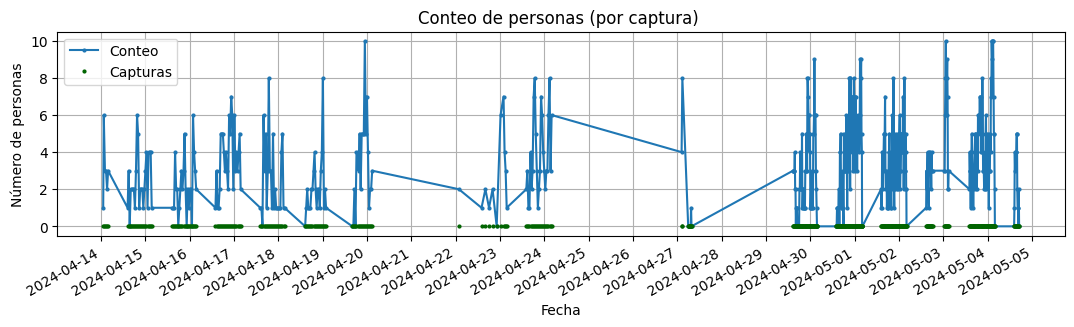

In [11]:
plot_df_counts(raw_df)

# Agragaciones temporales

In [12]:
grupos_dic = {}
agrupaciones = ['2h', '4h', 'D', 'W']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

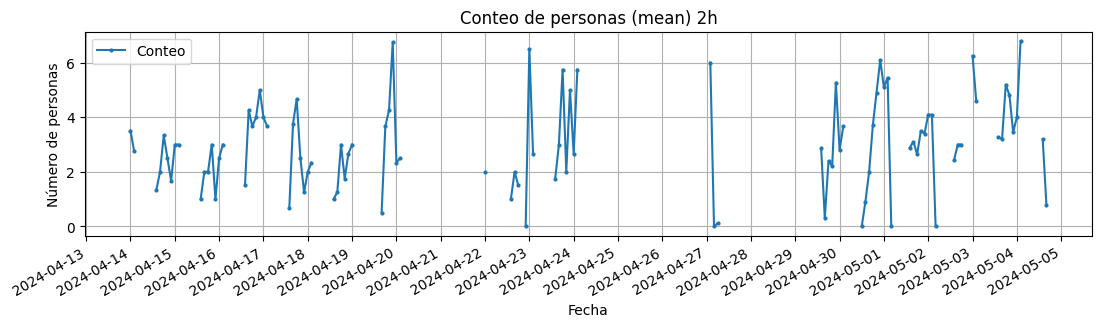

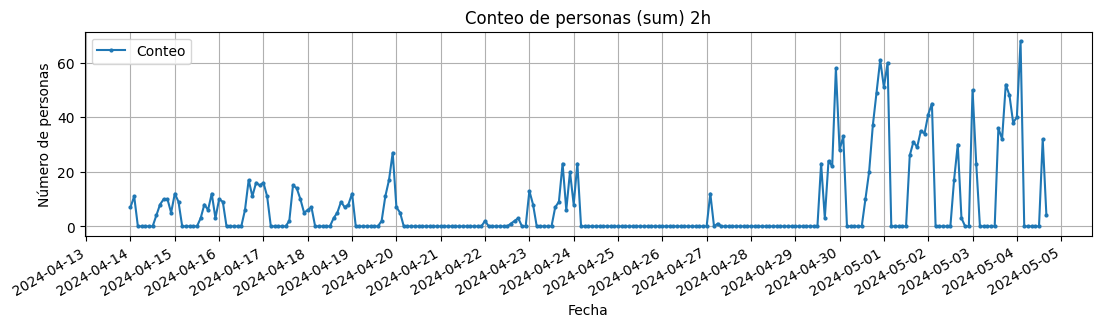

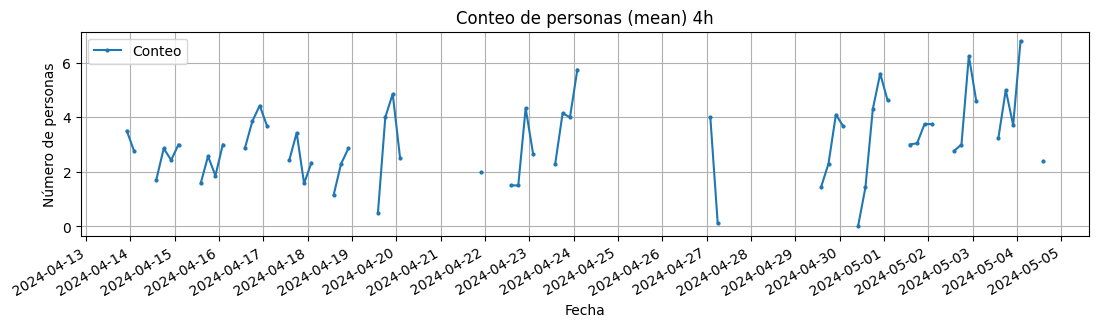

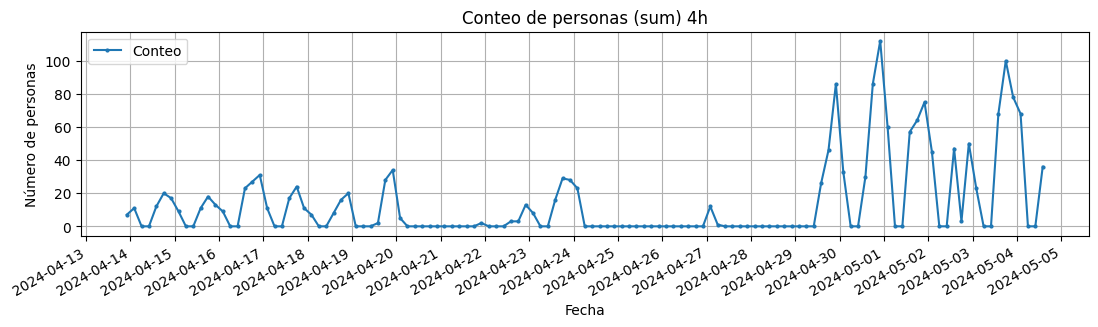

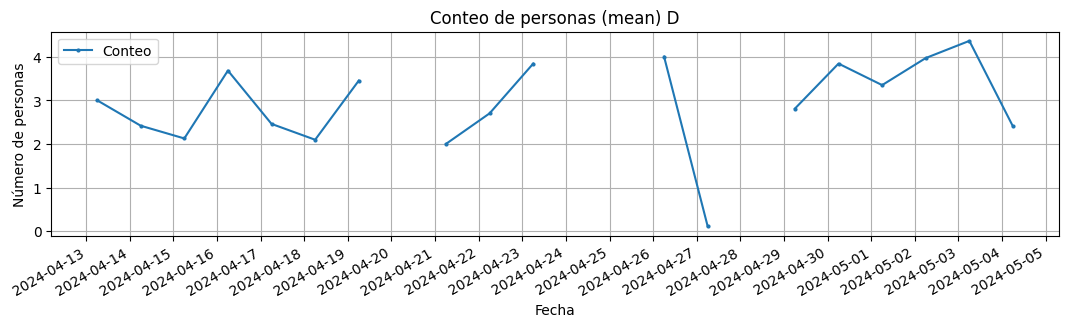

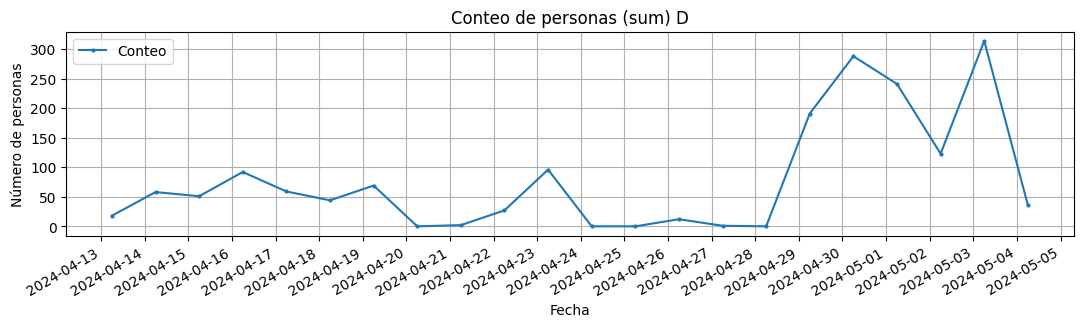

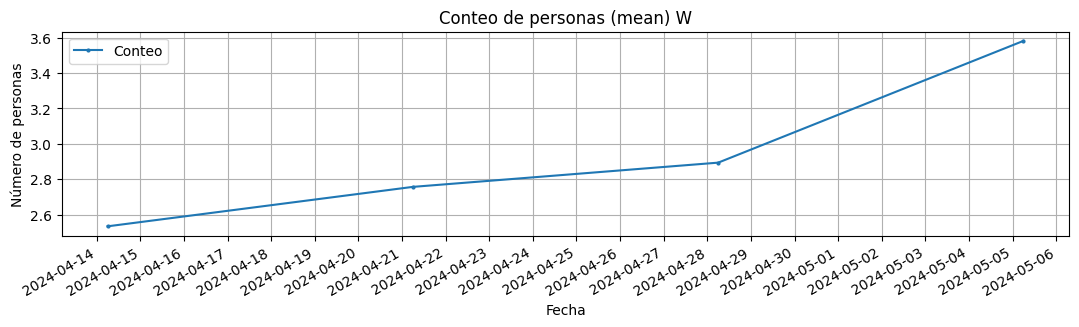

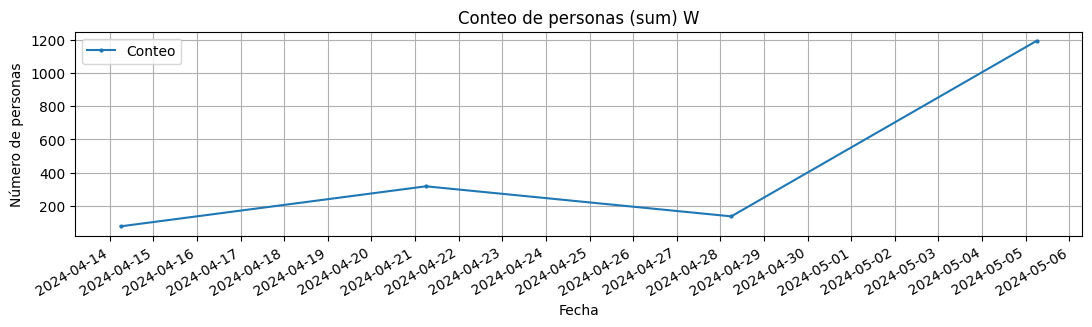

In [13]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo)

# Ejemplos de imagenes capturadas

In [14]:
import glob
import cv2 as cv
import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm

In [15]:
objt_detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1")

El modelo `Faster R-CNN Inception ResNet v2 1024x1024` es un modelo de detección de objetos que ha sido entrenado en el conjunto de datos COCO 20171. Este modelo utiliza una red neuronal convolucional profunda como `Inception ResNet v2` como su columna vertebral (backbone) para extraer características de las imágenes. El modelo es capaz de detectar objetos en imágenes escalando las imágenes de entrenamiento a un tamaño de 1024x1024 píxeles.

El proyecto COCO, o Common Objects in Context, es un conjunto de datos de referencia ampliamente utilizado para la evaluación de algoritmos de detección, segmentación y reconocimiento de objetos en imágenes. Contiene más de 200,000 imágenes etiquetadas con 80 categorías de objetos diferentes, lo que lo hace uno de los conjuntos de datos más completos y desafiantes en el campo de la visión por computadora.

El modelo Faster R-CNN es conocido por su eficiencia en la detección de objetos, ya que combina la generación de propuestas de regiones (region proposal network, RPN) y la detección de objetos en una sola red, lo que permite un proceso de detección más rápido y preciso en comparación con métodos anteriores

Referencias

> - Ren, S., He, K., Girshick, R., & Sun, J. (2016). Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks. arXiv preprint arXiv:1506.01497v3. Recuperado de arXiv:1506.01497
> - COCO - Common Objects in context. (n.d.). https://cocodataset.org/#home



## Funciones auxiliares

In [16]:
def get_annotated_img_objects(img, detector_output, score_threshold=0.50, onlyhumans=True):
    """
    Anota objetos detectados en una imagen basándose en la salida de un detector.

    Parámetros:
    img (np.array): La imagen original en la que se detectarán los objetos.
    detector_output (dict): Un diccionario con las salidas del detector, incluyendo clases, cajas y puntuaciones.
    score_threshold (float, opcional): El umbral de puntuación para considerar una detección válida.
    onlyhumans (bool, opcional): Si es True, solo se anotarán detecciones humanas.

    Devuelve:
    tuple: Una tupla conteniendo la imagen anotada, el número de objetos detectados,
           los índices de las detecciones, las cajas detectadas y los tipos de objetos.
    """

    # Extrae la información relevante del output del detector
    class_ids = detector_output.get("detection_classes")[0]
    boxes = detector_output.get("detection_boxes")[0]
    scores = detector_output.get("detection_scores")[0]
    num_detections = int(detector_output.get("num_detections")[0])

    # Convierte la imagen de entrada a un array de numpy y prepara las variables
    image = np.array(img)
    objects = 0
    y_scale, x_scale, _ = image.shape
    ids = []
    object_type = []
    detected_boxes = {}

    # Decide qué objetos se van a anotar
    if onlyhumans:
        objects2plot = [1]  # Solo humanos
    else:
        objects2plot = list(set(class_ids.astype(int)))  # Todos los objetos detectados

    # Itera sobre todas las detecciones
    for i in range(num_detections):
        # Verifica si la detección cumple con el umbral y si es un objeto a anotar
        if scores[i] >= score_threshold and int(class_ids[i]) in objects2plot:
            box = boxes[i]
            y_min, x_min, y_max, x_max = box

            # Dibuja un rectángulo alrededor del objeto detectado
            cv.rectangle(image, (int(x_min*x_scale), int(y_min*y_scale)), 
                         (int(x_max*x_scale), int(y_max*y_scale)), (0, 255, 0), 5)
            objects += 1
            ids.append(i)
            object_type.append(int(class_ids[i]))
            detected_boxes[i] = [(int(x_min*x_scale), int(y_min*y_scale)), 
                                 (int(x_max*x_scale), int(y_max*y_scale))]

    # Devuelve la imagen anotada junto con información sobre las detecciones
    return image, objects, ids, detected_boxes, object_type

In [17]:
def detect_persons(img_list, detector, score_threshold=0.85, plot=True, size=(13,13)):
    """
    Detecta personas en una lista de imágenes utilizando un detector proporcionado.

    Parámetros:
    img_list (list): Lista de rutas de archivos de imágenes para procesar.
    detector (modelo): Modelo de detección de objetos para identificar personas.
    score_threshold (float, opcional): Umbral de puntuación para filtrar detecciones.
    plot (bool, opcional): Si es True, muestra las imágenes con las detecciones.
    size (tuple, opcional): Tamaño de la imagen a mostrar.

    Devuelve:
    dict: Diccionario con imágenes etiquetadas y sus cajas de detección.
    dict: Diccionario con cajas de detección por imagen.
    """

    # Inicializa diccionarios para almacenar resultados
    images_labeled = {}
    boxes_per_image = {}

    # Procesa cada imagen en la lista
    for filename in tqdm(img_list):
        # Lee la imagen y la convierte al espacio de color RGB
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Obtiene la salida del detector para la imagen actual
        detector_output = detector(tf.expand_dims(img, axis=0))
        # Anota la imagen con las detecciones de personas
        img_detect, objects, ids, detected_boxes, object_type = get_annotated_img_objects(img, detector_output, score_threshold=score_threshold)
        # Almacena la imagen anotada y las detecciones en el diccionario
        images_labeled[filename.split("\\")[-1]] = {'img': img_detect, 'boxes':detected_boxes, 'object':object_type}
        boxes_per_image[filename.split("\\")[-1]] = detected_boxes

    # Si se debe mostrar, itera sobre las imágenes etiquetadas y las muestra
    if plot:
        for name, image in images_labeled.items():
            mostrar_imagen(image['img'], cmap='', title=name, size=size)
            
    # Devuelve los diccionarios con las imágenes etiquetadas y las cajas de detección
    return images_labeled, boxes_per_image


In [18]:
def plot_images_in_grid(images_labeled, columns=3, cmap='gray', size=(23, 23)):
    """
    Muestra una cuadrícula de imágenes con anotaciones.

    Parámetros:
    images_labeled (dict): Un diccionario con nombres de imágenes y sus datos correspondientes.
    columns (int, opcional): Número de columnas en la cuadrícula.
    cmap (str, opcional): Mapa de colores para mostrar las imágenes.
    size (tuple, opcional): Tamaño de la figura en pulgadas.

    Devuelve:
    None: Esta función no devuelve nada, solo muestra las imágenes en una cuadrícula.
    """

    # Calcula el número total de imágenes
    total_images = len(images_labeled)
    
    # Calcula el número de filas necesarias
    rows = total_images // columns + (total_images % columns > 0)
    
    # Configura el tamaño de la figura basado en el número de filas y columnas
    plt.figure(figsize=(size[0], size[1] * rows))
    
    # Itera a través de las imágenes y sus nombres
    for index, (name, image) in enumerate(images_labeled.items()):
        # Crea un subplot para cada imagen
        plt.subplot(rows, columns, index + 1)
        # Muestra la imagen con o sin un mapa de colores
        if cmap == "":
            plt.imshow(image['img'])
        else:
            plt.imshow(image['img'], cmap)
        # Cuenta el número de objetos detectados
        n_counts = len(image['object'])
        # Define el título con el nombre y el número de personas detectadas
        title = f'{name}\nPersonas detectadas: {n_counts}'
        plt.title(title, fontsize=10)
        plt.axis('off')  # Oculta los ejes
    
    plt.tight_layout()  # Ajusta la disposición de los subplots
    plt.show()  # Muestra la cuadrícula con todas las imágenes


## Seleccion de imagenes a desplegar

In [19]:
import random

In [20]:
imgs_path = '../../../data/raw/imgs/downloaded_images/selected_images'

filenames_list = glob.glob(imgs_path + "\/*.jpg")

subset = 12
random_sample = sorted(list(random.sample(filenames_list, subset)))

In [21]:
images_labeled, boxes_per_image = detect_persons(random_sample, objt_detector, plot=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:45<00:00,  3.82s/it]


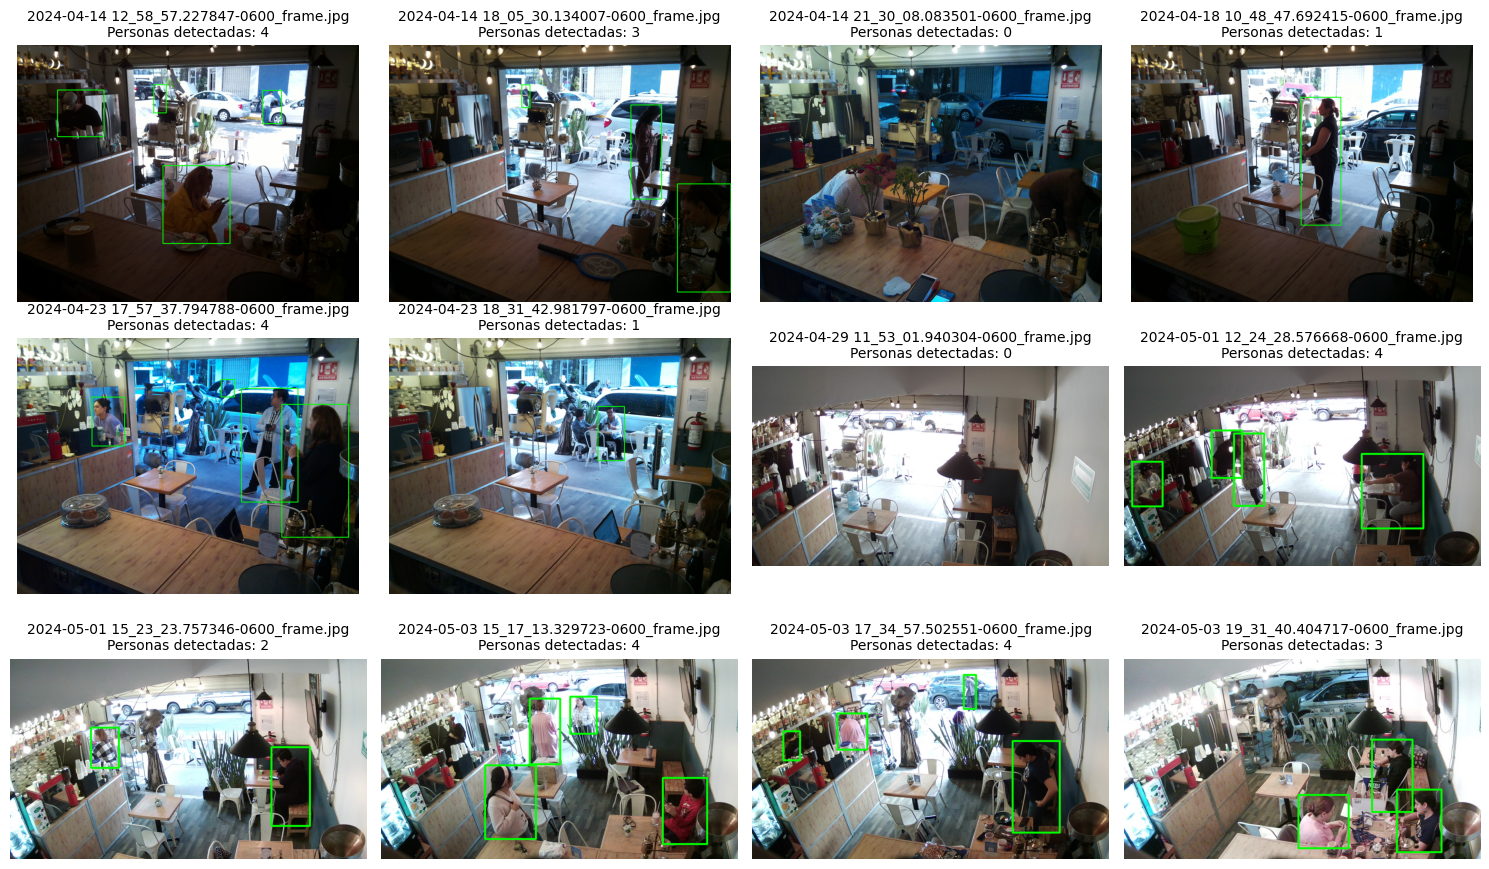

In [22]:
plot_images_in_grid(images_labeled, columns=4, size=(15,3))